# Whitebox NN for Query-70

    Datasize  IdleTimeout  BacklogTimeout  ExecutorAdded  ExecutorRemoved  \
0         20            5              15              4                2   
1         20           20               8              6                0   
2         20           20              15              3                0   
3         20           16               8              5                0   
4         20            3              19              5                4   
5         20            6              12              7                6   
6         20           10              12              4                3   
7         20           11               6             11                5   
8         20           17               9              6                5   
9         20           10               9              5                1   
10       100            5              15              6                5   
11       100            9               8              8                2   

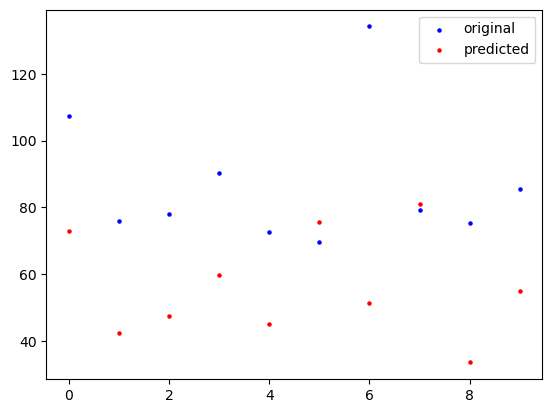

In [1]:
# This notebook is based on the methodology described in:
# Tariq, H., & Das, O. (2023). Execution Time Prediction Model that Considers Dynamic Allocation of Spark Executors.
# In: Gilly, K., Thomas, N. (eds) Computer Performance Engineering. EPEW 2023. LNCS, vol 14231. Springer, Cham.
# DOI: https://doi.org/10.1007/978-3-031-43185-2_23

#!/usr/bin/env python
# coding: utf-8

# In[1]:


import os, sys
import pandas as pd
import numpy as np


# In[2]:


data = pd.read_csv('query70train1.csv')
print(data)


# In[3]:


import sklearn
from sklearn import model_selection
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

#training set and test set
train_set=data[data[['Datasize']].isin([20, 100, 200]).any(axis=1)]
test_set=data[data[['Datasize']].isin([500]).any(axis=1)]

#print("TRAIN SET", train_set)
#print("TEST SET", test_set)



#train set: x,y split
x_train_set = train_set[['Datasize', 'IdleTimeout', 'BacklogTimeout','Stage0_Tasks','Stage0_Median','Stage0_Max',
                         'Stage1_Tasks', 'Stage1_Median','Stage1_Max','Stage2_Tasks','Stage2_Median',
                         'Stage2_Max', 'Stage3_Tasks', 'Stage3_Median', 'Stage3_Max','Stage4_Tasks','Stage4_Median', 
                         'Stage4_Max','Stage5_Tasks','Stage5_Median', 'Stage5_Max']]
y_train_set = train_set['ExecutionTime']


#test set: x,y split
x_test_set = test_set[['Datasize', 'IdleTimeout', 'BacklogTimeout','Stage0_Tasks','Stage0_Median','Stage0_Max',
                         'Stage1_Tasks', 'Stage1_Median','Stage1_Max','Stage2_Tasks','Stage2_Median',
                         'Stage2_Max', 'Stage3_Tasks', 'Stage3_Median', 'Stage3_Max','Stage4_Tasks','Stage4_Median', 
                         'Stage4_Max','Stage5_Tasks','Stage5_Median', 'Stage5_Max']]
y_test_set = test_set['ExecutionTime']




print ("\ntrain/test split lengths ", len(x_train_set),len(x_test_set),len(y_train_set),len(y_test_set))

#normalizing training input data 
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(x_train_set)
test_x_scaled = scaler.fit_transform(x_test_set)

#regressor parameters 
mlp = MLPRegressor(hidden_layer_sizes=(25,25), max_iter=10000, alpha= 0.001, 
                   solver= 'adam', activation='relu', batch_size= 1, 
                   learning_rate= 'adaptive', learning_rate_init= 0.01, 
                   beta_1= 0.9)

#fit training data 
training = mlp.fit(train_x_scaled, y_train_set)
print("\nconfiguration: ", training)

#prediction
y_pred = mlp.predict(test_x_scaled)

actual = np.array(y_test_set)
pred = np.array(y_pred)

print ("\nprediction: ", pred) #array_output
print ("\nactual: ", actual)

mape = np.mean(np.abs((actual - pred)/actual)) * 100

print("mape = ", mape)
print("built-in function mape: ", mean_absolute_percentage_error(actual, pred))

# plot: predicted vs actual 
x_ax = range(len(y_test_set))
plt.scatter(x_ax, y_test_set, s=5, color="blue", label="original")
plt.scatter(x_ax, pred, s=5, color="red", label="predicted")
plt.legend()
plt.show()


# In[ ]: